# app-fermi

Run the app-fermi example from the Rappture examples.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
#import numpy as np
import hublib.rappture as rappture
from hublib import ureg, Q_

Load the tool.

In [2]:
io = rappture.Tool("app-fermi/tool.xml")

See what inputs are available.

In [3]:
io

Path,Label,Description
input.number(temperature),Ambient temperature,Temperature of the environment.
input.number(Ef),Fermi Level,Energy at center of distribution.


We can get more detail about an input by inspecting the XML.

In [4]:
io['input.number(temperature)'].xml()

<number id="temperature">
            <about>
                <label>Ambient temperature</label>
                <description>Temperature of the environment.</description>
            </about>
            <units>K</units>
            <min>0K</min>
            <max>500K</max>
            <default>300K</default>
            <preset>
                <value>300K</value>
                <label>300K (room temperature)</label>
            </preset>
            <preset>
                <value>77K</value>
                <label>77K (liquid nitrogen)</label>
            </preset>
            <preset>
                <value>4.2K</value>
                <label>4.2K (liquid helium)</label>
            </preset>
        <current>300K</current></number>
        


Set some values.

In [5]:
io['input.number(temperature).current'] = 100
io['input.number(Ef).current'] = 2.1e-6

Run. Setting the verbose flag displays  the commands as they are run.

In [6]:
io.run(verbose=True)

cmd= /apps/bin/rappture -execute /home/nanohub/mmh/data/sessions/1139522/tool_driver_17058.xml -tool /home/nanohub/mmh/notebooks/example_notebooks/examples/rappture/app-fermi/tool.xml > /home/nanohub/mmh/data/sessions/1139522/tool_run_17058.xml
cache tag is ""
Cache checking: 19716 microseconds per iteration
checking cache=0



In [7]:
io.outputs

Path,Label,Description
output.curve(f12),Fermi-Dirac Factor,


<IPython.core.display.Javascript object>


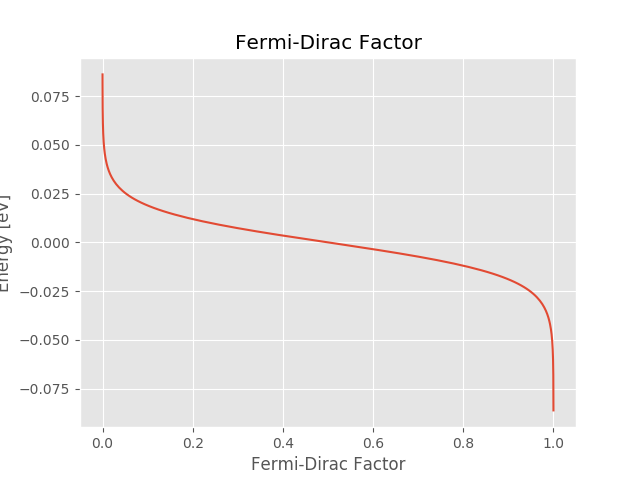

In [8]:
io['output.curve(f12)'].plot()

We currently don't have a convenient way to process multiple runs, so collect the xy data and plot using matplotlib.

<IPython.core.display.Javascript object>


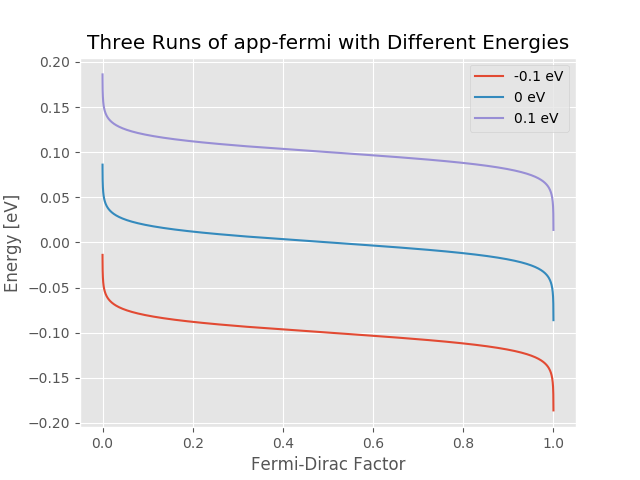

In [9]:
plt.figure()
for ev in [-.1, 0, .1]:
    io['input.number(Ef).current'] = ev
    io.run(verbose=False)
    xy = io['output.curve(f12).component.xy'].value
    plt.plot(xy[:,0], xy[:,1], label='%s eV' % ev)
plt.legend()
plt.xlabel('Fermi-Dirac Factor')
plt.ylabel('Energy [eV]')
plt.title('Three Runs of app-fermi with Different Energies');